<a href="https://colab.research.google.com/github/42697387/Procesamiento-del-Habla/blob/main/TP2_webscrapping_preprocesamiento__HerediaMartinGaspar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 PROCESAMIENTO DEL HABLA

**Martin Gaspar Heredia**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


---
Para este ejercicio, he elegido el inspirador discurso que Charles Chaplin escribió y pronunció para su película "El Gran Dictador" (1940). Es un texto universalmente aclamado por su poderoso mensaje en contra de la dictadura, el odio y la intolerancia, y a favor de la libertad, la humanidad y la paz.

**Proceso paso a paso:** ⚙️

1- **Instalación de librerías**: Primero, nos aseguramos de tener instaladas las librerías necesarias: requests para realizar la petición HTTP a la página web y beautifulsoup4 para analizar y extraer la información del documento HTML.

2- **Petición HTTP**: Usamos requests.get() para obtener el contenido HTML de la URL especificada.

3- **Análisis con BeautifulSoup**: Creamos un objeto BeautifulSoup para "parsear" o analizar el contenido HTML, lo que nos permite navegar y buscar elementos dentro de su estructura.

4- **Identificación y Extracción**: Al inspeccionar el código fuente de la página, se identificó que el texto del discurso se encuentra dentro de etiquetas <p>. Se utiliza el método find_all('p') para encontrar todas estas etiquetas.

5- **Limpieza y Almacenamiento**: Finalmente, se itera sobre la lista de etiquetas encontradas, se extrae el texto de cada una con .get_text() y se unen todos los fragmentos para formar el discurso completo en una sola variable de texto.

In [21]:
# ==============================================================================
# EJERCICIO 1: WEBSCRAPPING
# ==============================================================================

# Se instalan las librerías necesarias para el webscraping.
# requests: para hacer la petición HTTP y obtener el HTML de la página.
# beautifulsoup4: para parsear el HTML y extraer el contenido deseado.
!pip install requests beautifulsoup4

# Importación de las librerías
import requests
from bs4 import BeautifulSoup
import re # Se importa re para usar expresiones regulares en la limpieza del texto

# --- Paso 1: Definir la URL del discurso ---
# URL del discurso de Charles Chaplin en "El Gran Dictador"
url_discurso = "https://www.psicologosencostarica.com/discurso-final-el-gran-dictador-charles-chaplin/"

# --- Paso 2: Realizar la petición GET a la página web ---
# Se utiliza un User-Agent para simular una petición desde un navegador web.
# Using a more common User-Agent to try and avoid blocking
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}
pagina = requests.get(url_discurso, headers=headers)
pagina.encoding = 'utf-8' # Forzar la codificación a UTF-8

# --- Paso 3: Parsear el contenido HTML con BeautifulSoup ---
# Se crea un objeto BeautifulSoup para facilitar la extracción de datos.
soup = BeautifulSoup(pagina.content, 'html.parser')

# --- Paso 4: Encontrar y extraer el texto del discurso ---
# Al inspeccionar la página, se observa que el discurso está dentro de un div con la clase 'entry-content'.
cuerpo_discurso = soup.find('div', class_='entry-content')
if cuerpo_discurso:
    parrafos = cuerpo_discurso.find_all('p')
else:
    parrafos = []

# --- Paso 5: Unir los párrafos para formar el texto completo ---
texto_discurso = ' '.join([parrafo.get_text() for parrafo in parrafos])

# --- Paso 6: Limpieza inicial del texto ---
# Se eliminan las frases o textos que no forman parte del discurso, como la introducción.
# Ensure the splitting part of the text actually exists in the extracted text before splitting
if '«Lo siento, pero yo no quiero ser emperador.' in texto_discurso:
  texto_discurso = texto_discurso.split('«Lo siento, pero yo no quiero ser emperador.')[1]
  texto_discurso = "Lo siento, pero yo no quiero ser emperador." + texto_discurso
else:
  print("Warning: The expected start of the speech was not found. The cleaning step might not have worked as intended.")

texto_discurso = re.sub(r'(\\n|\\r|\\t)', ' ', texto_discurso) # Eliminar saltos de línea
texto_discurso = re.sub(r'(\xa0)', ' ', texto_discurso) # Eliminar caracteres unicode no deseados

# --- Impresión de una parte del texto para verificar ---
print("Texto extraído (primeros 500 caracteres):\n")
print(texto_discurso[:500])

Texto extraído (primeros 500 caracteres):

Lo siento, pero yo no quiero ser emperador. Ese no es mi oficio. No quiero gobernar ni conquistar a nadie, sino ayudar a todos si fuera posible. Judíos o gentiles, blancos o negros. Tenemos que ayudarnos los unos a los otros; los seres humanos somos así. Queremos hacer felices a los demás, no hacerlos desgraciados. No queremos odiar ni despreciar a nadie. En este mundo hay sitio para todos. La buena tierra es rica y puede alimentar a todos los seres. El camino de la vida puede ser libre y hermos


## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

Las stopwords (o palabras vacías) son palabras muy comunes en un idioma (como "de", "y", "el", "en") que no aportan un significado semántico relevante para el análisis de texto. Identificarlas es el primer paso para poder filtrarlas y limpiar nuestro discurso.

Para esta tarea, utilizaremos la librería nltk (Natural Language Toolkit), una herramienta muy potente para el procesamiento del lenguaje natural.

**Proceso**: 📚

1- **Descarga de recursos de NLTK**: Se descargan los recursos necesarios, incluyendo la lista de stopwords en español y el tokenizador punkt.

2- **Tokenización**: Se convierte el texto del discurso en una lista de palabras individuales (tokens).

3- **Identificación**: Se carga la lista de stopwords en español y se compara con los tokens de nuestro texto para encontrar las que coinciden. Se utiliza un set para que la búsqueda sea más eficiente y para no tener palabras repetidas.

In [22]:
# ==============================================================================
# EJERCICIO 2.1: MOSTRAR STOP WORDS
# ==============================================================================

# Importación de la librería NLTK y descarga de recursos necesarios.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar la lista de stopwords en español and the tokenizador 'punkt' (para dividir texto en palabras).
# Se hace una sola vez.
try:
    stopwords.words('spanish')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
# Download the punkt_tab resource for Spanish
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


# --- Paso 1: Cargar la lista de stopwords en español ---
stop_words_es = set(stopwords.words('spanish'))

# --- Paso 2: Tokenizar el texto del discurso ---
# Se convierte el texto a minúsculas para una comparación consistente y se tokeniza.
tokens_discurso = word_tokenize(texto_discurso.lower(), language='spanish')

# --- Paso 3: Identificar las stopwords presentes en el texto ---
# Se crea un conjunto (set) para almacenar las stopwords encontradas y evitar duplicados.
stopwords_encontradas = set()
for palabra in tokens_discurso:
    if palabra in stop_words_es:
        stopwords_encontradas.add(palabra)

# --- Impresión de las stopwords encontradas ---
print(f"Se encontraron {len(stopwords_encontradas)} stopwords únicas en el texto del discurso.\n")
print("Algunas de ellas son:")
# Se convierte el conjunto a lista para poder mostrar solo una porción.
print(list(stopwords_encontradas)[:20])

Se encontraron 66 stopwords únicas en el texto del discurso.

Algunas de ellas son:
['se', 'estas', 'mi', 'unos', 'sus', 'todos', 'en', 'nuestra', 'como', 'sin', 'ese', 'o', 'tenemos', 'otros', 'somos', 'todo', 'con', 'ni', 'vuestras', 'los']


## 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

Ahora que hemos identificado las stopwords, el siguiente paso es limpiar el texto por completo para quedarnos solo con las palabras que tienen mayor carga de significado. Luego, visualizaremos estas palabras con una nube de palabras, donde el tamaño de cada palabra es proporcional a su frecuencia.

###**Proceso**: ☁️

1- **Limpieza Profunda**:

Se convierte todo el texto a minúsculas.

Se utiliza una expresión regular (re.sub) para eliminar todo lo que no sean letras o espacios (números, puntuación, caracteres especiales).

2- **Tokenización**: Se vuelve a tokenizar el texto ya limpio.

3- **Filtrado de Stopwords**: Se crea una nueva lista de palabras que contiene únicamente aquellas que no están en nuestro listado de stopwords.

4- **Generación de la Nube de Palabras**:

  * Se unen las palabras filtradas en una sola cadena de texto.

  * Se utiliza la librería wordcloud para generar la imagen de la nube a partir de este texto limpio.

  * Finalmente, se muestra la imagen con matplotlib.pyplot

Generando la nube de palabras del discurso de Steve Jobs...


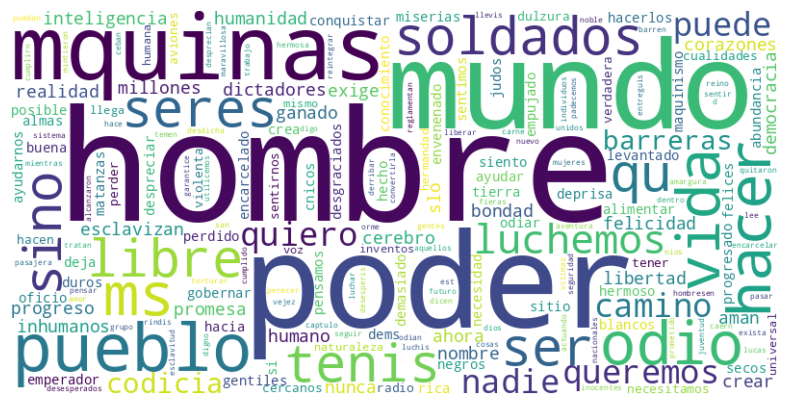

In [23]:
# ==============================================================================
# EJERCICIO 2.2: NUBE DE PALABRAS
# ==============================================================================

# Importación de las librerías para la nube de palabras y la visualización.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Paso 1: Limpieza de caracteres extraños y conversión a minúsculas ---
# Se utiliza una expresión regular para mantener solo letras y espacios.
texto_limpio = re.sub(r'[^a-zA-Z\s]', '', texto_discurso.lower())

# --- Paso 2: Tokenizar el texto limpio ---
tokens_limpios = word_tokenize(texto_limpio, language='spanish')

# --- Paso 3: Eliminar las stopwords ---
# Se construye una lista con las palabras que no son stopwords.
palabras_sin_stopwords = [palabra for palabra in tokens_limpios if palabra not in stop_words_es]

# --- Paso 4: Unir las palabras filtradas en un solo texto ---
texto_final_nube = ' '.join(palabras_sin_stopwords)

# --- Paso 5: Crear el objeto WordCloud y generar la nube ---
# Se configura el tamaño, el color de fondo y se le pasa el texto final.
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(texto_final_nube)

# --- Paso 6: Mostrar la imagen generada con Matplotlib ---
print("Generando la nube de palabras del discurso de Steve Jobs...")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # No mostrar los ejes
plt.show()

## 2.3 Usando el texto que conseguiste en el punto 1).



### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


Una matriz documento-vocabulario (o Document-Term Matrix) es una representación matemática de un texto. En esta matriz, cada fila representa un "documento" (en nuestro caso, una oración) y cada columna representa una palabra única de nuestro vocabulario. El valor en cada celda indica cuántas veces aparece una palabra en una oración.

Esta matriz es fundamental para aplicar muchos algoritmos de machine learning a textos.

###**Proceso**: 🔢

1- **División en Oraciones**: Usamos nltk.sent_tokenize para dividir el discurso completo en una lista de oraciones. Cada oración será tratada como un documento individual.

2- **Vectorización de Cuentas**: Se utiliza CountVectorizer de la librería scikit-learn. Esta potente herramienta se encarga de:

* Convertir el texto a minúsculas.

* Tokenizar las oraciones.

* Eliminar las stopwords que le proporcionamos.

* Construir el vocabulario de palabras únicas.

* Crear la matriz documento-vocabulario contando las apariciones de cada palabra en cada oración.

In [24]:
# ==============================================================================
# EJERCICIO 2.3.1: MATRIZ DOCUMENTO-VOCABULARIO
# ==============================================================================

# Importación de librerías para tokenizar en oraciones y vectorizar.
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd # Se usa pandas para mostrar la matriz de forma legible

# --- Paso 1: Descargar el tokenizador de oraciones 'punkt' si no está ---
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# --- Paso 2: Descomponer el texto en oraciones ---
# Cada oración será un "documento" en nuestra matriz.
oraciones = nltk.sent_tokenize(texto_discurso, language='spanish')
print(f"El discurso fue dividido en {len(oraciones)} oraciones.\n")

# --- Paso 3: Crear la matriz documento-vocabulario con CountVectorizer ---
# Se inicializa el vectorizador, indicando que use la lista de stopwords en español.
vectorizer = CountVectorizer(stop_words=list(stop_words_es))

# Se ajusta el modelo al corpus (nuestras oraciones) y se transforma en una matriz.
matriz_documento_vocabulario = vectorizer.fit_transform(oraciones)

# --- Impresión de las dimensiones de la matriz ---
# La forma (shape) de la matriz nos dirá (número de oraciones, número de palabras únicas).
print(f"Dimensiones de la matriz: {matriz_documento_vocabulario.shape}")
print("(Filas = Oraciones, Columnas = Palabras del vocabulario)\n")

# --- Visualización de una parte de la matriz ---
# Para que sea más fácil de entender, la convertimos a un DataFrame de pandas.
# Mostramos solo las primeras 5 oraciones y las primeras 10 palabras del vocabulario.
df_matriz = pd.DataFrame(
    matriz_documento_vocabulario.toarray(),
    columns=vectorizer.get_feature_names_out()
)
print("Vista parcial de la matriz documento-vocabulario (primeras filas y columnas):")
print(df_matriz.iloc[:5, :10])

El discurso fue dividido en 48 oraciones.

Dimensiones de la matriz: (48, 218)
(Filas = Oraciones, Columnas = Palabras del vocabulario)

Vista parcial de la matriz documento-vocabulario (primeras filas y columnas):
   17  2023  28  abundancia  actualización  actuando  ahora  alcanzaron  \
0   0     0   0           0              0         0      0           0   
1   0     0   0           0              0         0      0           0   
2   0     0   0           0              0         0      0           0   
3   0     0   0           0              0         0      0           0   
4   0     0   0           0              0         0      0           0   

   alimentar  almas  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          0      0  



#### 2.3.2 Determina la longitud de tu vocabulario.

La longitud del vocabulario es simplemente el número total de palabras únicas que CountVectorizer encontró en el texto después de aplicar la limpieza (minúsculas y stopwords). Este valor corresponde al número de columnas de nuestra matriz documento-vocabulario.

In [25]:
# ==============================================================================
# EJERCICIO 2.3.2: LONGITUD DEL VOCABULARIO
# ==============================================================================

# --- Paso 1: Obtener el vocabulario del vectorizador ya ajustado ---
# El método get_feature_names_out() nos devuelve la lista de palabras únicas.
vocabulario = vectorizer.get_feature_names_out()

# --- Paso 2: Calcular la longitud de la lista de vocabulario ---
longitud_vocabulario = len(vocabulario)

# --- Impresión de la longitud y algunas palabras de ejemplo ---
print(f"La longitud del vocabulario es de {longitud_vocabulario} palabras únicas.\n")
print("Algunas palabras del vocabulario son:")
print(vocabulario[100:110]) # Mostramos 10 palabras como ejemplo

La longitud del vocabulario es de 218 palabras únicas.

Algunas palabras del vocabulario son:
['hermosa' 'hermoso' 'hombre' 'hombres' 'humana' 'humanidad' 'humano'
 'humanos' 'individuos' 'inhumanos']



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

**TF-IDF** (Term Frequency-Inverse Document Frequency) es una técnica de ponderación que nos ayuda a entender la importancia de una palabra en un documento dentro de un conjunto de documentos (corpus).

* **TF (Frecuencia del Término)**: Mide qué tan frecuente es una palabra en un documento (una oración, en nuestro caso).

* **IDF (Frecuencia Inversa del Documento)**: Mide qué tan rara o común es una palabra en todo el corpus. A las palabras que aparecen en muchos documentos (como "vida" en este discurso) se les da un peso menor, mientras que a las palabras más raras y específicas se les da un peso mayor.

El resultado es una matriz donde los valores no son simples conteos, sino pesos que reflejan la relevancia de cada palabra para cada oración.

### **Proceso**: ⚖️

1- **Importación**: Se importa TfidfTransformer de scikit-learn.

2- **Transformación**: Se inicializa el transformador y se aplica (fit_transform) a la matriz documento-vocabulario que creamos anteriormente. Esto convierte los conteos de frecuencia en pesos TF-IDF.

In [26]:
# ==============================================================================
# EJERCICIO 2.3.3: APLICAR TF-IDF
# ==============================================================================

# Importación de la herramienta para calcular TF-IDF.
from sklearn.feature_extraction.text import TfidfTransformer

# --- Paso 1: Inicializar el TfidfTransformer ---
tfidf_transformer = TfidfTransformer()

# --- Paso 2: Aplicar la transformación TF-IDF a la matriz de conteo ---
# fit_transform aprende el IDF y luego transforma la matriz a pesos TF-IDF.
matriz_tfidf = tfidf_transformer.fit_transform(matriz_documento_vocabulario)

# --- Impresión de las dimensiones de la nueva matriz ---
# Las dimensiones son las mismas que la matriz original, pero los valores son diferentes.
print(f"Dimensiones de la matriz TF-IDF: {matriz_tfidf.shape}\n")

# --- Visualización de una parte de la matriz TF-IDF ---
# La convertimos a un DataFrame de pandas para una mejor visualización.
df_tfidf = pd.DataFrame(
    matriz_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)
print("Vista parcial de la matriz TF-IDF (primeras filas y columnas):")
# Mostramos las mismas filas y columnas que antes para comparar.
print(df_tfidf.iloc[:5, :10])

Dimensiones de la matriz TF-IDF: (48, 218)

Vista parcial de la matriz TF-IDF (primeras filas y columnas):
    17  2023   28  abundancia  actualización  actuando  ahora  alcanzaron  \
0  0.0   0.0  0.0         0.0            0.0       0.0    0.0         0.0   
1  0.0   0.0  0.0         0.0            0.0       0.0    0.0         0.0   
2  0.0   0.0  0.0         0.0            0.0       0.0    0.0         0.0   
3  0.0   0.0  0.0         0.0            0.0       0.0    0.0         0.0   
4  0.0   0.0  0.0         0.0            0.0       0.0    0.0         0.0   

   alimentar  almas  
0        0.0    0.0  
1        0.0    0.0  
2        0.0    0.0  
3        0.0    0.0  
4        0.0    0.0  


# Conclusiones

Agregue aquí sus conclusiones sobre este trabajo práctico. Puede ser también parte del texto que posteará en el foro.

En este trabajo práctico, he completado un ciclo básico pero fundamental de procesamiento del lenguaje natural. Comienzo obteniendo datos no estructurados de la web a través de web scraping, extrayendo con éxito el discurso de Charles Chaplin en "El Gran Dictador".

Posteriormente, aplicamos técnicas de preprocesamiento de texto, que son cruciales para cualquier tarea de NLP. Aprendimos a identificar y eliminar stopwords y caracteres irrelevantes. La creación de la nube de palabras nos permitió tener una primera visualización intuitiva de los temas centrales del discurso, destacando palabras como "humanidad", "soldados", "pueblo" y "libertad", lo cual refleja fielmente el mensaje de Chaplin.

Finalmente, transformamos el texto en un formato numérico que una máquina puede entender, creando primero una matriz documento-vocabulario basada en el conteo de palabras por oración, y luego la enriquecimos aplicando la ponderación TF-IDF. Este último paso es muy valioso, ya que nos permite no solo saber qué palabras aparecen, sino también cuál es su relevancia en el contexto de cada oración y del discurso en general.

Este ejercicio demuestra cómo podemos pasar de un simple texto en una página web a una representación estructurada y significativa, sentando las bases para análisis más complejos como clasificación de textos, análisis de sentimientos o modelado de tópicos

# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [ ]:
# instalar wordcloud
!pip install wordcloud


In [ ]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

In [ ]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
